In [1]:
!pip install dmba
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pylab as plt
from dmba import classificationSummary, liftChart, gainsChart

no display found. Using non-interactive Agg backend


In [2]:
df = pd.read_csv('Textbook adoption 3 groups.csv')

In [3]:
df.head()

,University,Enrollment,AvgSAT,PctTenure,PCLabs,PctOwnPC,Tuition,Status
0,1,17455,1068,0.793,154,0.465,17400,Never
1,2,14445,1173,0.846,162,0.506,16300,Never
2,3,14773,1122,0.809,158,0.680,15600,Never
3,4,16138,992,0.634,133,0.542,10100,Never
4,5,16717,1141,0.807,123,0.644,16500,Never


In [4]:
df['Status'].value_counts()

Still     42
Never     40
NoMore    37
Name: Status, dtype: int64

In [5]:
# Create new column that groups the data into 2 metaclasses of NoMore against other classes
df['NoMore'] = [1 if x =='NoMore' else 0 for x in df['Status']]

In [6]:
predictors = ['Enrollment','AvgSAT','PctTenure','PCLabs','PctOwnPC','Tuition']
outcome = 'NoMore'

In [7]:
# partition data
X = df[predictors]
y = df[outcome]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4, random_state = 202)

In [8]:
# Run a logistic regression
logit_reg = LogisticRegression(penalty='l2',C=1e42, solver='liblinear')

In [9]:
logit_reg.fit(X_train, y_train)

LogisticRegression(C=1e+42, solver='liblinear')

In [10]:
classificationSummary(y_valid, logit_reg.predict(X_valid))

Confusion Matrix (Accuracy 0.7708)

       Prediction
Actual  0  1
     0 32  7
     1  4  5


In [11]:
# Run a k-nearest neighbors model
knn = KNeighborsClassifier(n_neighbors=3)

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
classificationSummary(y_valid, knn.predict(X_valid))

Confusion Matrix (Accuracy 0.7708)

       Prediction
Actual  0  1
     0 30  9
     1  2  7


In [14]:
# Run a neural net
n_net = MLPClassifier(hidden_layer_sizes=(3), activation='logistic',solver='lbfgs')

In [15]:
n_net.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=3, solver='lbfgs')

In [16]:
classificationSummary(y_valid, n_net.predict(X_valid))

Confusion Matrix (Accuracy 0.8125)

       Prediction
Actual  0  1
     0 39  0
     1  9  0


In [17]:
# Q3 the neural net had the highest accuracy, but the model is not particularly useful because it predicted every record as a 0, resulting in all 1s being incorrectly predicted as 0s.
# K-nearest neighbors and Logistic regression models had similar accuracy rates, but k-nearest neighbors may be slightly more useful as it predicted more true positives than the Logistic regression model.

In [18]:
lr_predictiondf = pd.DataFrame({'predicted': logit_reg.predict(X_valid), 'actual': y_valid})
knn_predictiondf = pd.DataFrame({'predicted': knn.predict(X_valid), 'actual': y_valid})
n_net_predictiondf = pd.DataFrame({'predicted': n_net.predict(X_valid), 'actual': y_valid})

In [19]:
lr_df = lr_predictiondf.sort_values(by=['predicted'], ascending=False)
knn_df = knn_predictiondf.sort_values(by=['predicted'], ascending=False)
n_net_df = n_net_predictiondf.sort_values(by=['predicted'], ascending=False)

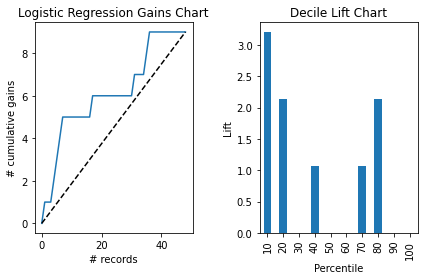

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(lr_df['actual'], ax=axes[0])
ax.set_title('Logistic Regression Gains Chart')

ax = liftChart(lr_df['actual'], ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()

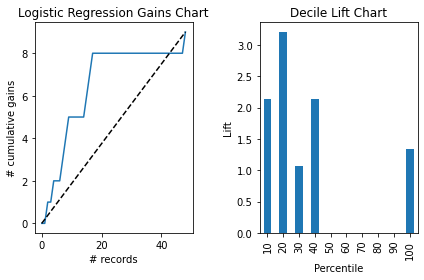

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(knn_df['actual'], ax=axes[0])
ax.set_title('Logistic Regression Gains Chart')

ax = liftChart(knn_df['actual'], ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()

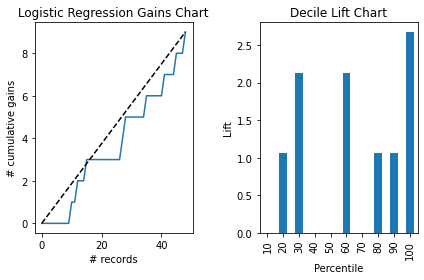

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(n_net_df['actual'], ax=axes[0])
ax.set_title('Logistic Regression Gains Chart')

ax = liftChart(n_net_df['actual'], ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()

In [23]:
# Q4 The logistic regression model had the highest lift on the first decile, while the neural net model had the lowest. 
# The neural net model's gains falling under the baseline indicates that the neural net model might not be a good fit for the data.
# On the other hand, the Logistic regression and k-nearest neighbors both seem to perform acceptably based on their gains and lift charts.